In [28]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**FICHIER DATA STUDENTS**

In [29]:
data_students = pd.read_csv("BDD_initial/Students Social Media Addiction.csv", sep=",", index_col=0)
data_students.head()


,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
Student_ID,,,,,,,,,,,,
1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [30]:
sns.set_theme(style="whitegrid")
#param pour visualisations

**Distribution des heures d'utilisation quotidienne**
Ce graphique montre combien d'heures par jour les étudiants utilisent les reseaux sociaux. Il permet de voir que la majorité des étudiants se situe entre les 4 et les 5 heures par jour.

In [31]:
data_students["Avg_Daily_Usage_Hours"].mean()

np.float64(4.918723404255319)

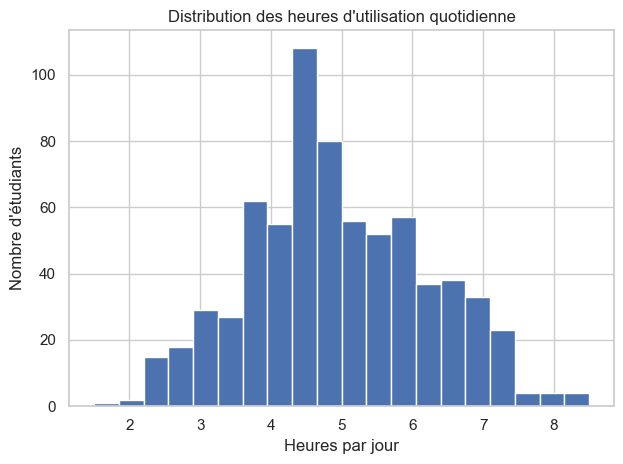

In [32]:
fig, ax = plt.subplots()
ax.hist(data_students["Avg_Daily_Usage_Hours"], bins=20, color="#4C72B0", edgecolor="white")
ax.set_title("Distribution des heures d'utilisation quotidienne")
ax.set_xlabel("Heures par jour")
ax.set_ylabel("Nombre d'étudiants")
plt.tight_layout()
plt.show()


**Fréquence du score d'addiction (barre frequence)**
Ici on vois répresente combiend d'etudiants ont chaque score de d'addiction (de 1 à 10).
On remarque que 209 étudiants déclarent un score d'addiction de 7.

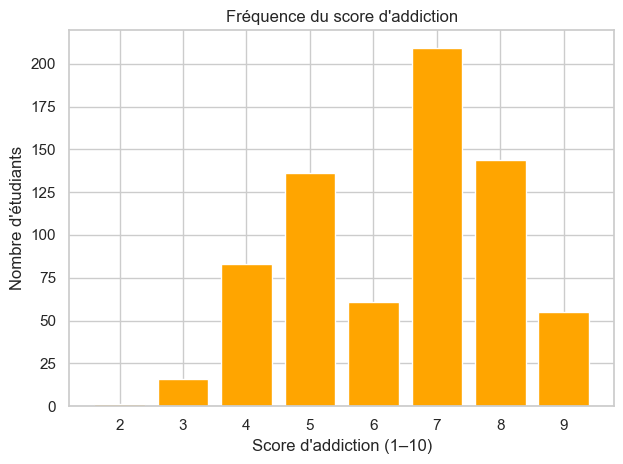

np.int64(209)

In [33]:
fig, ax = plt.subplots()
compte = data_students["Addicted_Score"].value_counts().sort_index()
ax.bar(compte.index, compte.values, color="orange", edgecolor="white")
ax.set_title("Fréquence du score d'addiction")
ax.set_xlabel("Score d'addiction (1–10)")
ax.set_ylabel("Nombre d'étudiants")
ax.set_xticks(compte.index)
plt.tight_layout()
plt.show()
compte.values.max()

**Score d'addiction par genre**
Le graphique compare le niveau d'addiction entes les femmes et les hommes. La boîte réprente où se concentrent 50% des valeurs, et la ligne centrale est la mediane. On remarque que, dans ce jeux de données, les femmes déclarent un niveau d'addiction plus élévé que les hommes.

C:\Users\leaca\AppData\Local\Temp\ipykernel_26168\3988987996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


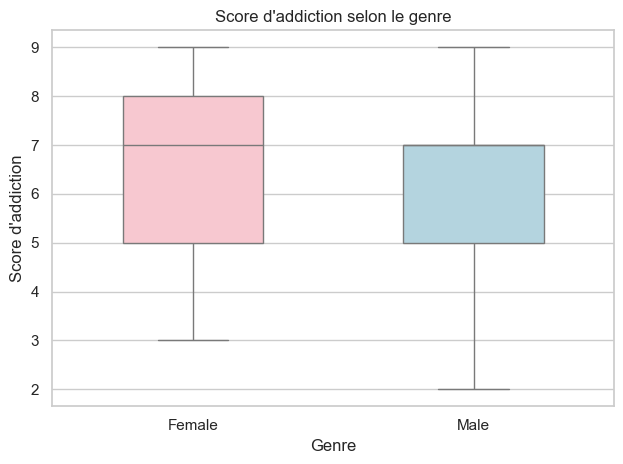

In [34]:
fig, ax = plt.subplots()
sns.boxplot(
    data=data_students,
    x="Gender",
    y="Addicted_Score",
    palette={"Female": "pink", "Male": "lightblue"},
    width=0.5,
    ax=ax,
)
ax.set_title("Score d'addiction selon le genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Score d'addiction")
plt.tight_layout()
plt.show()


**Heures d'utilisation par niveau academique (violin plot)**
Le violin plot montre comment varie l'utilisation quotidienne des réseaux sociaux selon le niveau d'études (Lycée, Licence ou Master).
Ici on remarque que:
- Les **lycéens** ont une utilisation très concétré autour de 5-6 heures par jours, avec peu de variation (forme du violon étroite)
- Les **étudiants** en licence presenten une distribution plus large et plus variée. Les valeurs vont de 2h jusqu'à presque 9h par jour. 
- Les **étudiants** en master ont une utilisation conentée autour de 4.5h par jour, avec une utilisation un peu plus régulière et modérée.

C:\Users\leaca\AppData\Local\Temp\ipykernel_26168\2623365973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


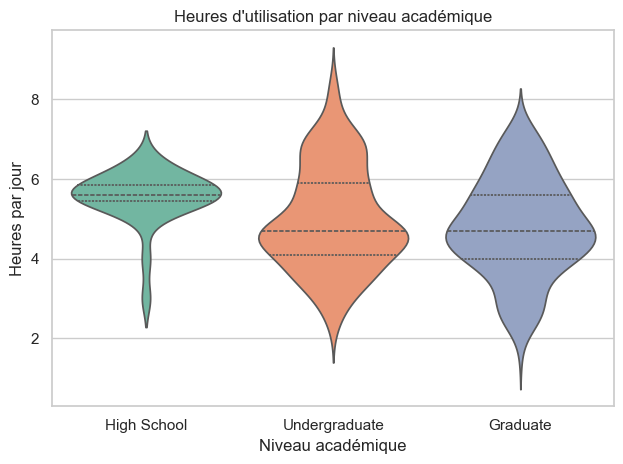

In [35]:
ordre = ["High School", "Undergraduate", "Graduate"]
fig, ax = plt.subplots()
sns.violinplot(
    data=data_students,
    x="Academic_Level",
    y="Avg_Daily_Usage_Hours",
    order=ordre,
    palette="Set2",
    inner="quartile",
    ax=ax,
)
ax.set_title("Heures d'utilisation par niveau académique")
ax.set_xlabel("Niveau académique")
ax.set_ylabel("Heures par jour")
plt.tight_layout()
plt.show()

**Santé mentale moyenne selon le score addiction**
Ce graphique met en relation le score d'addiction et la santé mentale moyenne. La tendence est presque parfaitement linéaire: plus le score d'addicition est élevé, plus la santé mentale se dégrade.
La descente est réguliere ce qui renforce l'idée d'une correlation négative forte entre les deux variables.
Cependant on peut pas affimer avec certitude que c'est l'addiction qui cause les problèmes de santé mentale. On peut pas nécessairement parler de causalité.

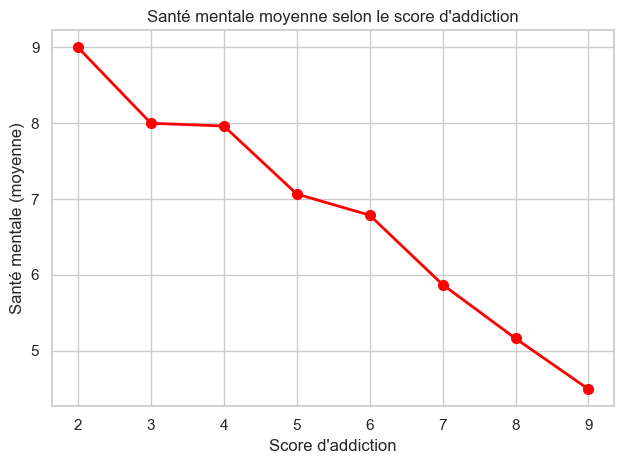

In [36]:
moyennes = data_students.groupby("Addicted_Score")["Mental_Health_Score"].mean()

fig, ax = plt.subplots()
ax.errorbar(
    moyennes.index,
    moyennes.values,
    fmt="o-",
    color="red",
    capsize=5,
    linewidth=2,
    markersize=7,
)
ax.set_title("Santé mentale moyenne selon le score d'addiction")
ax.set_xlabel("Score d'addiction")
ax.set_ylabel("Santé mentale (moyenne)")
ax.set_xticks(moyennes.index)
plt.tight_layout()
plt.show()


**Plateforme la plus utilisée**
Le graphique montre quelles sont les plateformes les plus utilisées par les étudiants de l'échantillon

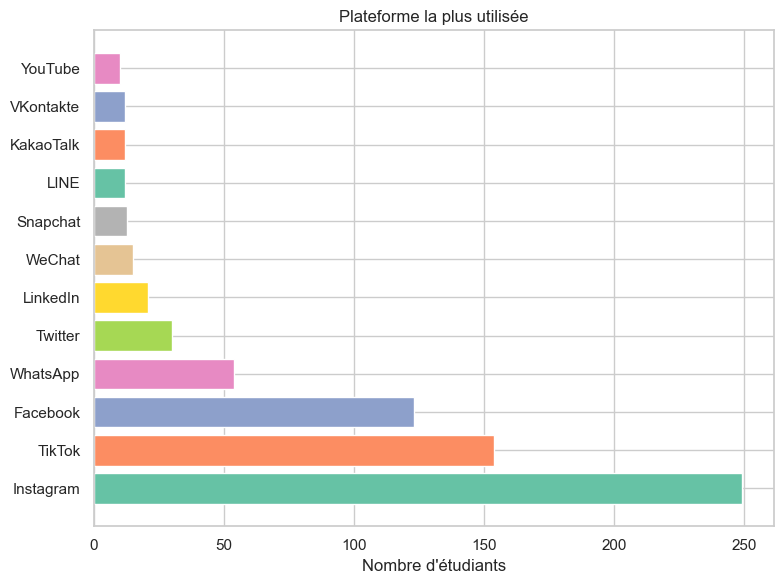

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
compte = data_students["Most_Used_Platform"].value_counts()
ax.barh(compte.index, compte.values,
        color=sns.color_palette("Set2", len(compte)))
ax.set_title("Plateforme la plus utilisée")
ax.set_xlabel("Nombre d'étudiants")
plt.tight_layout()
plt.show()